# Ruina del jugador


Dos jugadores $A$ y $B$ apuestan en un juego lanzando una moneda, $A$ gana con probabilidad $p\in(0,1)$ si cae sol y $B$ gana con probabilidad $q = 1-p$ si cae águila. El juego consiste en repetir los lanzamientos de manera independiente hasta que alguno de los dos jugadores se quede sin dinero.

Una pregunta que podríamos hacer es:<br>
Si $A$ inicia con $n$ pesos y $B$ con $N-n$ pesos, ¿cuál es la probabilidad de que $A$ gane el juego?

No es tan complicado resolver este problema analíticamente:<br>
Sea $A_n = \mathbb{P}[ A \text{ gane empezando con $n$ pesos} ]$.<br>
Podemos ver que $A_0=0$ y $A_N=1$.

Solo nos resta calcular el valor de $A_n$ cuando $0<n<N$. <br>
En cualquiera de estos casos podemos condicionar a lo que suceda en el siguiente lanzamiento de la moneda, por lo que:

\begin{align}
A_n &= \mathbb{P}[ A \text{ gane empezando con $n$ pesos} | A \text{ gana el sig. juego} ]\mathbb{P}[A \text{ gana el sig. juego} ] \\
& + \mathbb{P}[ A \text{ gane empezando con $n$ pesos} | A \text{ pierde el sig. juego} ] \mathbb{P}[A \text{ pierde el sig. juego} ]\\
&= pA_{n+1} + qA_{n-1}
\end{align}

A partir de esta ecuación recursiva podemos resolver $A_n$ para toda $0<n<N$:
\begin{align}
A_n &= pA_{n+1} + qA_{n-1}\\
(p+q)A_n &= pA_{n+1} + qA_{n-1}\\
pA_n + qA_n &= pA_{n+1} + qA_{n-1}\\
p(A_n - A_{n+1}) &= q(A_{n-1} - A_n)\\
A_{n+1} - A_n &= \frac{q}{p}(A_{n} - A_{n-1}).
\end{align}

Usando la condición inicial, $A_0=0$, notemos que:
\begin{align}
A_{2} - A_1 &= \frac{q}{p}(A_{1} - A_{0}) = \frac{q}{p}A_{1}\\
A_{3} - A_2 &= \frac{q}{p}(A_{2} - A_{1}) = \left(\frac{q}{p}\right)^2 A_{1}\\
&\vdots \\
A_{n} - A_{n-1} &= \frac{q}{p}(A_{n-1} - A_{n-2}) = \left(\frac{q}{p}\right)^{n-1} A_{1}.
\end{align}

Sumando éstas ecuaciones:
\begin{align}
A_n - A_1 &= A_1\sum_{k=1}^{n-1} \left(\frac{q}{p}\right)^{k}\\
\implies A_n &= A_1\sum_{k=0}^{n-1} \left(\frac{q}{p}\right)^{k}\\
&= \begin{cases}
\left[ \frac{1-\left(\frac{q}{p}\right)^{n}}{1 - \frac{q}{p}} \right]A_1, & q\neq p. \\
nA_1, & q=p
\end{cases}
\end{align}

Por último, usando la condición final, $A_N=1$, podemos despejar $A_1$ en la ecuación anterior para cada caso y concluir que:
\begin{align}
A_n &= \begin{cases}
\frac{1-\left(\frac{q}{p}\right)^{n}}{1-\left(\frac{q}{p}\right)^{N}}, & q\neq p \\
\frac{n}{N}, & q=p.
\end{cases}
\end{align}

## Veamos cómo podemos estimar estas probabilidades utilizando números pseudoaleatorios

Primero, escribimos una función que nos permita obtener una posible trayectoria de éste juego.
<br>



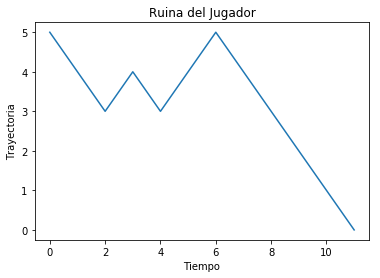

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Supogamos que el jugador A empieza con n pesos
# B con N-n pesos
# A_n el evento A gana empezando con n pesos
# p = proba de que A gane una ronda

# La función juego_ruina toma los parámetros n,N y p,
# guarda en el vector a_rw la trayectoria del juego 
# visto desde A, el cuál termina hasta que A llega a 0 o a N.
def juego_ruina(n,N,p):
    #El jugador inicia con n pesos, es decir a_rw al tiempo 0 es n.
    a_rw = np.array([n])
    # Hacemos un loop que vaya guardando la trayectoria del juego
    # para el jugador A, este acaba cuando A se queda sin dinero
    # o cuando le gana todo su dinero a B.
    while a_rw[-1]<N and a_rw[-1]>0:
        # al valor anterior le suma o resta 1 peso aleatoriamente 
        # y lo agrega al vector a_rw
        a_rw = np.append(a_rw, a_rw[-1] + np.random.binomial(1,p)*2-1)
    # la funcion devuelve la trayectoria completa    
    return(a_rw)

#ejemplo de una trayectoria de este juego
# n=5, N=10, p=0.5
tray = juego_ruina(5,10,0.5)
tiempo = np.arange(len(tray))
plt.plot(tiempo, tray)
plt.title('Ruina del Jugador')
plt.xlabel('Tiempo')
plt.ylabel('Trayectoria')
plt.show()

Para estimar la probabilidad de ruina del jugador $A$ vamos a repetir $M$ veces el juego y ver en cuántos de esos juegos $A$ se arruina. Si el programa está bien hecho esto debe aproximarse a $1 - A_n$ que ya calculamos analíticamente.

In [ ]:
n=5
N=15
p=0.5
q=1-p
M=1000

#probabilidad de ruina teórica
#si p=0.5
#pr_teo= 1 - n/N
#si p!= 0.5
#pr_teo = 1 - (1 -(q/p)**n)/(1 -(q/p)**N)
pr_teo = (1 - n/N) if (p==0.5) else (1 - (1 -(q/p)**n)/(1 -(q/p)**N))
#guardamos el resultado de cada juego en res y cuánto duró en tau en cada una de las M repeticiones del juego
res, tau = np.array([]), np.array([])
for i in range(M):
    rui = juego_ruina(n,N,p)
    res, tau = np.append(res,rui[-1]), np.append(tau, len(rui)-1)
    plt.plot(rui, alpha=0.6)

# estimamos la probabilidad de que A se arruine como casos en que llega a cero entre el total de juegos
pr_est = np.sum(res == 0)/M
# estimamos la duración promedio del juego
tau_est = np.mean(tau)
# graficamos las trayectorias
plt.title('Ruina del Jugador')
plt.xlabel('Tiempo')
plt.ylabel('Trayectorias')
plt.show()
print('La probabilidad de ruina teórica es: '+ str(pr_teo))
print('La probabilidad de ruina empírica es: '+ str(pr_est))
print('La duración promedio del juego estimada es: '+ str(tau_est))

Ya vimos cómo podemos estimar la probabilidad de que $A$ se arruine, así como el tiempo promedio que dura el juego, al que llamamos $\tau$.<br>
Éste último es un $\textbf{tiempo aleatorio}$, y aunque no es tan díficil de calcular en este ejemplo de la ruina del jugador, en otros procesos se complica más su cálculo analítico. 


La ventaja de haber programado el experimento es que podemos experimentar con los parámetros y comprobar que a veces el sentido común es más común de lo que en realidad tiene sentido...<br>

Por ejemplo, pensemos que este juego es parte de un casino y que no es justo, pero no por mucho...<br> Supongamos que $p=0.49$, es decir, es casi casi justo. 

La gente suele hacer $\textbf{"estrategias"}$ como: "¡en cuanto llegue a tal cantidad de gananacia, me retiro!". 

Siendo más concretos, supongamos que $A$ empieza con 50 pesos y el casino sigue jugando hasta que $A$ se acabe su dinero.<br> 
$A$ se quiere retirar en cuánto llegue a 100 pesos.


Utilizando la idea del programa anterior vamos a estimar la probabilidad de que $A$ se retire antes de que se arruine.

In [71]:
n=50
N=100
p=0.5
q=1-p
M=500

#guardamos el resultado de cada juego y cuánto duró
tray = np.array([])
for i in range(M):
    rui=ruina(n,N,p)
    tray = np.append(tray,rui[-1])
    #plt.plot(rui, alpha=0.6)

pr_est = sum(tray == N)/M
#plt.title('Ruina del Jugador')
#plt.xlabel('Tiempo')
#plt.ylabel('Trayectorias')
#plt.show()
print('La probabilidad empírica de que A gane antes de arruinarse es: '+ str(pr_est))


La probabilidad empírica de que A gane antes de arruinarse es: 0.514


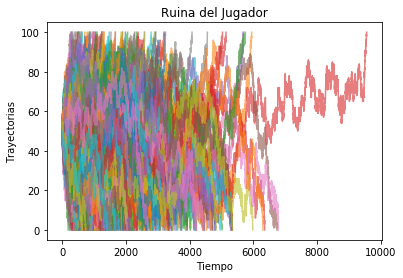

La probabilidad empírica de que A gane antes de arruinarse es: 0.124


In [72]:
n=50
N=100
p=0.49
q=1-p
M=500

#guardamos el resultado de cada juego y cuánto duró
tray = np.array([])
for i in range(M):
    rui=ruina(n,N,p)
    tray = np.append(tray,rui[-1])
    plt.plot(rui, alpha=0.6)

pr_est = sum(tray == N)/M
plt.title('Ruina del Jugador')
plt.xlabel('Tiempo')
plt.ylabel('Trayectorias')
plt.show()
print('La probabilidad empírica de que A gane antes de arruinarse es: '+ str(pr_est))